In [1]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [2]:
!pwd

/Users/cesare.chung/int/01_CODE_UNET


Loading training dataset...



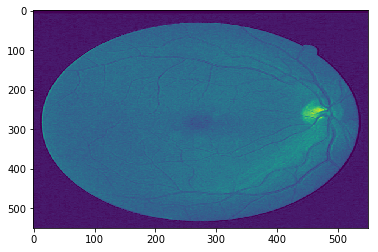

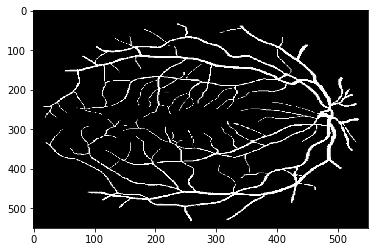

In [3]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_mask_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#
plt.imshow(X_data[19,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.show()
plt.imshow(Y_data[19,..., ], aspect="auto",cmap='gray')
plt.show()

Loading testing dataset...



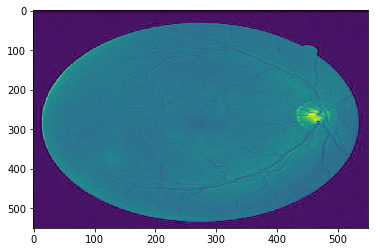

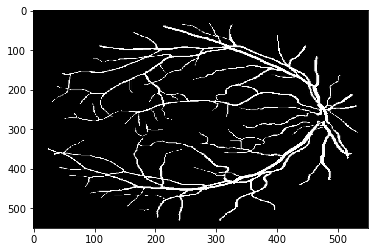

In [4]:
#
# Testing
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_mask_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_test.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#
plt.imshow(X_test[19,...,2], aspect="auto")   
plt.show()
plt.imshow(Y_test[19,..., ], aspect="auto",cmap='gray')
plt.show()

In [5]:
print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TRAIN data  shape: (20, 550, 550, 3)
TRAIN label shape: (20, 550, 550)
TEST  data  shape: (20, 550, 550, 3)
TEST  label shape: (20, 550, 550)


In [6]:
X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.bool)

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.bool)

In [7]:
training_iters = 32
epochs = 100
dropout = 0.75
display_step = 5

In [8]:
data_provider = image_util.SimpleDataProvider(X_data, Y_data, channels=3, n_class=2)

In [9]:
print(data_provider.channels)
print(data_provider.n_class)

3
2


In [10]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

2017-11-08 18:31:23,130 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [21]:
#path = trainer.train(data_provider, "./out", training_iters=training_iters, epochs=epochs, dropout=dropout, display_step=display_step)


2017-11-08 14:19:44,548 Removing '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-08 14:19:44,550 Removing '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-08 14:19:44,555 Allocating '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-08 14:19:44,557 Allocating '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-08 14:21:15,059 Verification error= 59.7%, loss= 0.6949
2017-11-08 14:21:21,286 Start optimization
2017-11-08 14:22:32,426 Iter 0, Minibatch Loss= 0.6236, Training Accuracy= 0.8044, Minibatch error= 19.6%
2017-11-08 14:24:44,031 Iter 2, Minibatch Loss= 0.9163, Training Accuracy= 0.8635, Minibatch error= 13.7%
2017-11-08 14:26:47,311 Iter 4, Minibatch Loss= 0.4955, Training Accuracy= 0.8635, Minibatch error= 13.7%
2017-11-08 14:28:57,019 Iter 6, Minibatch Loss= 0.5791, Training Accuracy= 0.8584, Minibatch error= 14.2%
2017-11-08 14:31:10,252 Iter 8, Minibatch Loss= 0.6102, Training Accuracy= 0.8044, Minibatch error= 19.6%
2017-11-08 14:33:22,710 Iter 10, Minibatc

In [11]:
####################
# Testing result   #
####################

In [12]:
prediction = net.predict("./out/model.cpkt", X_test[0:2,:,:,:])
#prediction = net.predict("./out/model.cpkt", X_test[0:1,:,:,:])
#prediction = net.predict("./out/model.cpkt", X_test[0:2])


INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-08 18:31:30,944 Restoring parameters from ./out/model.cpkt
2017-11-08 18:31:31,074 Model restored from file: ./out/model.cpkt


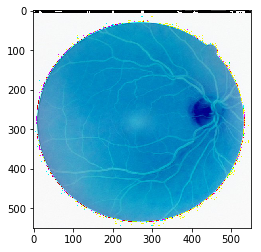

In [13]:
plt.imshow(X_test[5])
plt.imshow(X_test[1,:,:,:])

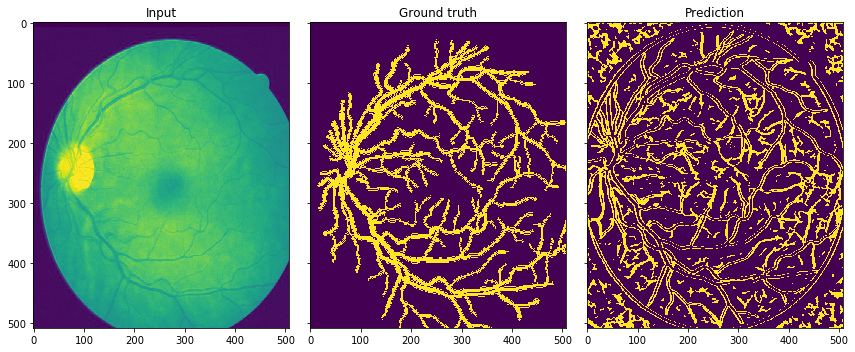

In [14]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()


In [15]:
print("PREDICTION",prediction.shape)

PREDICTION (2, 508, 508, 2)


In [16]:
X_test[0,...,1]
Y_test[0,...,]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [17]:
#prediction

In [18]:
test_generator =image_util.SimpleDataProvider(X_test, Y_test, channels=3, n_class=2)

In [19]:
X_test, Y_test = test_generator(1)

In [20]:
print("Testing error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Testing error rate: 48.83%


In [21]:
####################
# Training result  #
####################

In [22]:
X_test, Y_test = data_provider(1)

prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-08 18:32:11,791 Restoring parameters from ./out/model.cpkt
2017-11-08 18:32:11,931 Model restored from file: ./out/model.cpkt


In [23]:
print("Training error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Training error rate: 9.29%


In [24]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
util.save_image(img, "/Users/cesare.chung/int/retina_problem_Training.png")

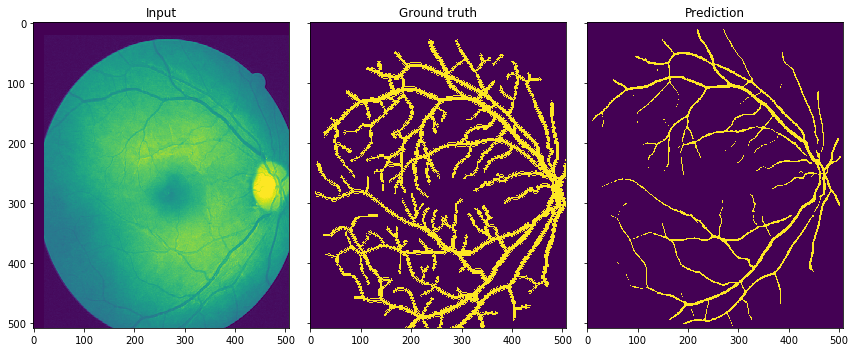

In [25]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()